In [37]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

In [38]:
measurements = pd.read_csv("measurements.csv")

In [39]:
measurements.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [40]:
measurements.columns = [x.lower() for x in measurements.columns]
measurements.columns = measurements.columns.str.replace("[ ]", "_", regex=True)

In [41]:
measurements.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [42]:
#refill liters, refill gas and specials contain too many NaN's. The values in the ac, rain , sun columns is the same as in specials so im not losing any data

In [43]:
measurements = measurements.drop(columns=['refill_gas', 'refill_liters', 'specials'])

In [44]:
measurements.dtypes

distance        object
consume         object
speed            int64
temp_inside     object
temp_outside     int64
gas_type        object
ac               int64
rain             int64
sun              int64
dtype: object

In [45]:
# measurements[["distance", "consume","temp_inside"]]=measurements[["distance", "consume","temp_inside"]].to_string()

In [46]:
 measurements["distance"]=measurements["distance"].str.replace(",", ".")

In [47]:
 measurements["consume"]=measurements["consume"].str.replace(",", ".")

In [48]:
 measurements["temp_inside"]=measurements["temp_inside"].str.replace(",", ".")

In [49]:
measurements[["distance", "consume","temp_inside"]] = measurements[["distance", "consume","temp_inside"]] .apply(pd.to_numeric, errors='coerce')

In [50]:
measurements.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [51]:
measurements.dtypes

distance        float64
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
gas_type         object
ac                int64
rain              int64
sun               int64
dtype: object

In [52]:
measurements.isna().sum()

distance         0
consume          0
speed            0
temp_inside     12
temp_outside     0
gas_type         0
ac               0
rain             0
sun              0
dtype: int64

In [53]:
measurements['ac'].value_counts()

0    358
1     30
Name: ac, dtype: int64

In [54]:
measurements['rain'].value_counts()

0    340
1     48
Name: rain, dtype: int64

In [55]:
measurements['sun'].value_counts()

0    356
1     32
Name: sun, dtype: int64

In [56]:
measurements['temp_inside'].value_counts()

21.5    133
22.0    102
22.5     59
20.0     25
21.0     13
23.0     13
25.0     12
24.5      7
20.5      4
24.0      3
23.5      2
25.5      2
19.0      1
Name: temp_inside, dtype: int64

In [57]:
measurements['temp_inside'] = measurements['temp_inside'].fillna(measurements['temp_inside'].mode()[0])
#i replaced the NaN with the mode

In [58]:
measurements.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
ac              0
rain            0
sun             0
dtype: int64

In [59]:
measurements.temperature_difference=(measurements['temp_inside'])-(measurements['temp_outside'])

C:\Users\laure\AppData\Local\Temp\ipykernel_23832\979845899.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  measurements.temperature_difference=(measurements['temp_inside'])-(measurements['temp_outside'])


In [60]:
measurements_numerical = measurements.select_dtypes(np.number)

In [61]:
correlationmatrix= measurements_numerical.corr()

In [62]:
correlationmatrix

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
distance,1.000000,-0.128967,0.562299,0.077636,0.088175,-0.025738,-0.019791,0.081120
consume,-0.128967,1.000000,-0.227866,-0.154953,-0.320811,0.096591,0.248118,-0.170667
speed,0.562299,-0.227866,1.000000,0.060039,0.015411,-0.035408,0.009489,0.081618
temp_inside,0.077636,-0.154953,0.060039,1.000000,0.357431,0.300407,-0.035199,0.241530
temp_outside,0.088175,-0.320811,0.015411,0.357431,1.000000,0.167562,-0.186315,0.346903
ac,-0.025738,0.096591,-0.035408,0.300407,0.167562,1.000000,0.242915,0.088598
rain,-0.019791,0.248118,0.009489,-0.035199,-0.186315,0.242915,1.000000,-0.112650
sun,0.081120,-0.170667,0.081618,0.241530,0.346903,0.088598,-0.112650,1.000000


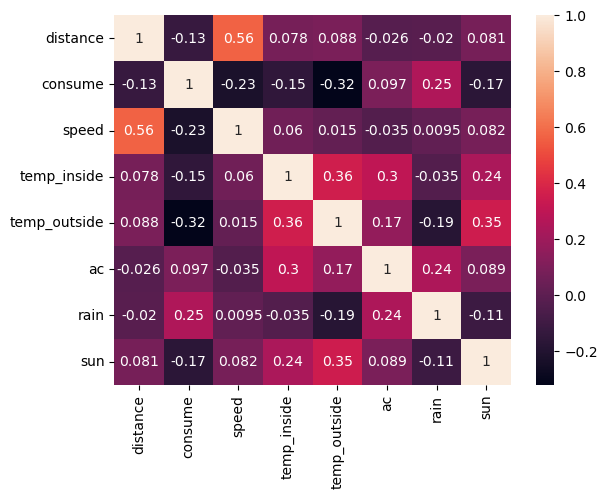

In [63]:
sns.heatmap(correlationmatrix, annot=True)
plt.show()
#i do not see multicolinearity

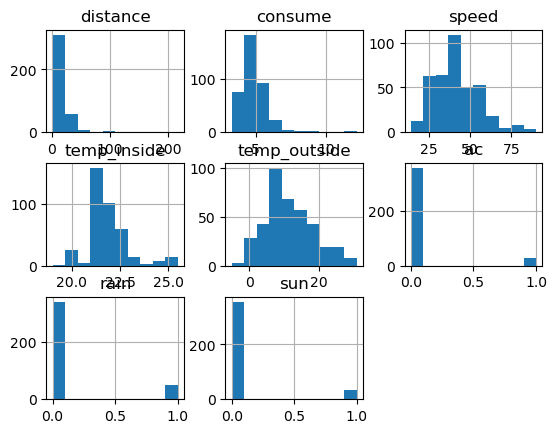

In [64]:
hist =measurements.hist()

<Axes: xlabel='gas_type', ylabel='consume'>

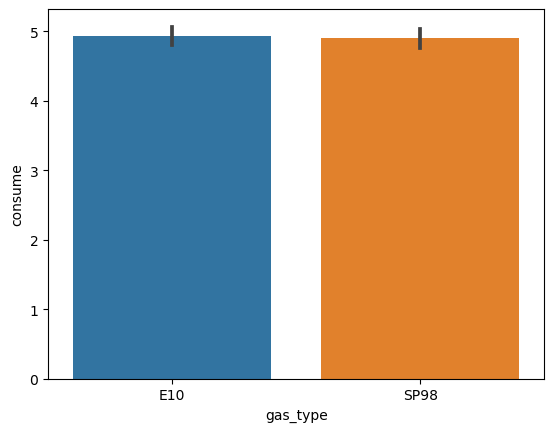

In [65]:
sns.barplot(x= 'gas_type',y='consume',data=measurements)

time is was up. I would add consumtion per ride. I would have included graphs to show at which average speed fuel consumption would go up. Then I would proceed to make a prediction on consumption. 
I would also make a H0 that there is no relation between fuel consumed and gas type.